<a href="https://colab.research.google.com/github/pvmlvamsi/DataScience-Project-Image-Classification-using-CNN-/blob/master/Facemask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Mask Detection using CNN

## Importing Libraries



In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D
from keras.layers import Activation , Dropout , Flatten , Dense
from keras import backend as k
import numpy as np
from keras.preprocessing import image

# Generating Data

In [ ]:
img_width , img_height = 350, 525
train_data_dir  = r'/content/drive/My Drive/Colab Notebooks/face_mask/face-mask-detector-master (2)/train'
validatation_data_dir = r'/content/drive/My Drive/Colab Notebooks/face_mask/face-mask-detector-master (2)/valid'
nb_train_samples = 100
nb_validation_samples = 10
epochs = 20
batch_size = 16

# Checking the Image Format

In [ ]:

if k.image_data_format() == 'channels_first':
    input_shape = (3,img_width,img_height)
else:
    input_shape = (img_width,img_height,3)

# Generating Training set and Test set

In [ ]:
train_datagen = ImageDataGenerator(

                   rescale = 1./255,
                   shear_range = 0.2,
                   zoom_range = 0.2,
                   horizontal_flip = True



)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator  = train_datagen.flow_from_directory(

                  train_data_dir,
                  target_size=(img_width,img_height),
                  batch_size = batch_size,
                  class_mode = 'binary'
    
)

Found 536 images belonging to 2 classes.


In [ ]:
validation_generator  = test_datagen.flow_from_directory(

                  validatation_data_dir ,
                  target_size=(img_width,img_height),
                  batch_size = batch_size,
                  class_mode = 'binary'
    
)

Found 536 images belonging to 2 classes.


# Convolutional Neural Network

In [ ]:
#Initialize the CNN
model = Sequential()

In [ ]:
#Step-1:convolution
model.add(Conv2D(32,(3,3),input_shape = input_shape,activation = 'relu'))

In [ ]:
#Step-2:Pooling
model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
#add another convolution to improve the accuracy of the model
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
#Step-3:Flattening
model.add(Flatten())

In [ ]:
#Step-4:Full Connection
model.add(Dense(units = 128 ,activation = 'relu'))
model.add(Dropout(0.6))
model.add(Dense(units = 64 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 1 , activation = 'sigmoid'))

#Displaying the Summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 348, 523, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 174, 261, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 172, 259, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 86, 129, 32)       0         
_________________________________________________________________
flatten (Flatten)            (None, 355008)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               45441152  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [ ]:
#Compiling
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

# Fitting the Model

In [ ]:
model.fit_generator(

           train_generator,
           steps_per_epoch = 536/16,
           epochs = epochs,
           validation_data = validation_generator,
           validation_steps = 536/16

)

Epoch 1/20
34/33 [==============================] - 236s 7s/step - loss: 0.4225 - accuracy: 0.8153 - val_loss: 0.2678 - val_accuracy: 0.9123
Epoch 2/20
34/33 [==============================] - 146s 4s/step - loss: 0.3466 - accuracy: 0.8545 - val_loss: 0.1881 - val_accuracy: 0.9310
Epoch 3/20
34/33 [==============================] - 151s 4s/step - loss: 0.2816 - accuracy: 0.8918 - val_loss: 0.2475 - val_accuracy: 0.9291
Epoch 4/20
34/33 [==============================] - 148s 4s/step - loss: 0.3113 - accuracy: 0.8918 - val_loss: 0.1773 - val_accuracy: 0.9422
Epoch 5/20
34/33 [==============================] - 147s 4s/step - loss: 0.2603 - accuracy: 0.9104 - val_loss: 0.1250 - val_accuracy: 0.9515
Epoch 6/20
34/33 [==============================] - 147s 4s/step - loss: 0.1946 - accuracy: 0.9328 - val_loss: 0.1233 - val_accuracy: 0.9571
Epoch 7/20
34/33 [==============================] - 151s 4s/step - loss: 0.2065 - accuracy: 0.9272 - val_loss: 0.2454 - val_accuracy: 0.9011
Epoch 8/20
34

# Evaluating the model

In [ ]:

# evaluate model
_, acc = model.evaluate_generator(validation_generator, steps=len(validation_generator), verbose=0)
print(Accuracy is:'> %.3f' % (acc * 100.0))

> 95.522


# Image prediction

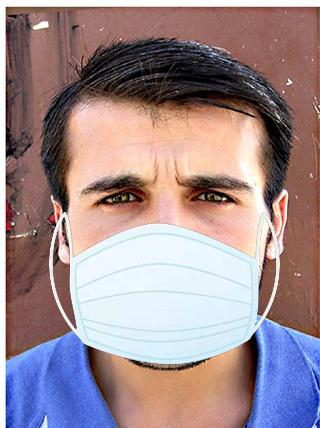

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/My Drive/Colab Notebooks/face_mask/face-mask-detector-master (2)/valid/with_mask/101-with-mask.jpg') 

In [ ]:
img_pred = image.load_img('/content/drive/My Drive/Colab Notebooks/face_mask/face-mask-detector-master (2)/valid/with_mask/101-with-mask.jpg',target_size = (350,525))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred,axis = 0)


In [ ]:
result = model.predict(img_pred)
if result[0][0] == 0:
  prediction = "With mask"
else:
  prediction = "With out mask"
print(result)

[[0.]]


In [ ]:
print(prediction)

With mask


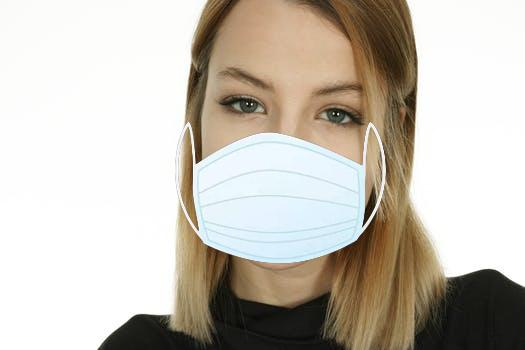

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/My Drive/Colab Notebooks/face_mask/face-mask-detector-master (2)/valid/with_mask/1-with-mask.jpg') 

In [ ]:
img_pred = image.load_img('/content/drive/My Drive/Colab Notebooks/face_mask/face-mask-detector-master (2)/valid/with_mask/1-with-mask.jpg',target_size = (350,525))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred,axis = 0)
result = model.predict(img_pred)
if result[0][0] == 0:
  prediction = "With mask"
else:
  prediction = "With out mask"
print(result)

[[0.]]


In [ ]:
print(prediction)

With mask


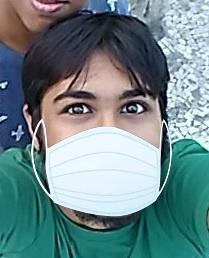

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/My Drive/Colab Notebooks/face_mask/face-mask-detector-master (2)/valid/with_mask/81-with-mask.jpg') 

In [ ]:
img_pred = image.load_img('/content/drive/My Drive/Colab Notebooks/face_mask/face-mask-detector-master (2)/valid/with_mask/81-with-mask.jpg',target_size = (350,525))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred,axis = 0)
result = model.predict(img_pred)
if result[0][0] == 0:
  prediction = "With mask"
else:
  prediction = "With out mask"
print(result)

[[0.]]


In [ ]:
print(prediction)

With mask


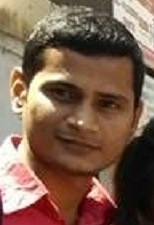

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/My Drive/Colab Notebooks/face_mask/face-mask-detector-master (2)/valid/without_mask/1.jpg') 

In [ ]:
img_pred = image.load_img('/content/drive/My Drive/Colab Notebooks/face_mask/face-mask-detector-master (2)/valid/without_mask/1.jpg',target_size = (350,525))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred,axis = 0)
result = model.predict(img_pred)
if result[0][0] == 0:
  prediction = "With mask"
else:
  prediction = "With out mask"
print(result)

[[1.]]


In [ ]:
print(prediction)

With out mask


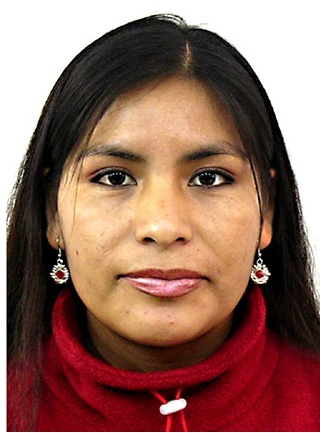

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/My Drive/Colab Notebooks/face_mask/face-mask-detector-master (2)/valid/without_mask/3.jpg') 

In [ ]:
img_pred = image.load_img('/content/drive/My Drive/Colab Notebooks/face_mask/face-mask-detector-master (2)/valid/without_mask/3.jpg',target_size = (350,525))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred,axis = 0)
result = model.predict(img_pred)
if result[0][0] == 0:
  prediction = "With mask"
else:
  prediction = "With out mask"
print(result)

[[1.]]


In [ ]:
print(prediction)

With out mask


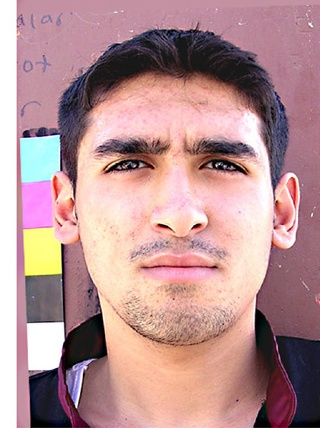

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/My Drive/Colab Notebooks/face_mask/face-mask-detector-master (2)/valid/without_mask/20.jpg') 

In [ ]:
img_pred = image.load_img('/content/drive/My Drive/Colab Notebooks/face_mask/face-mask-detector-master (2)/valid/without_mask/20.jpg',target_size = (350,525))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred,axis = 0)
result = model.predict(img_pred)
if result[0][0] == 0:
  prediction = "With mask"
else:
  prediction = "With out mask"
print(result)

[[1.]]


In [ ]:
print(prediction)

With out mask


# Predicting a New Image(outside from dataset)

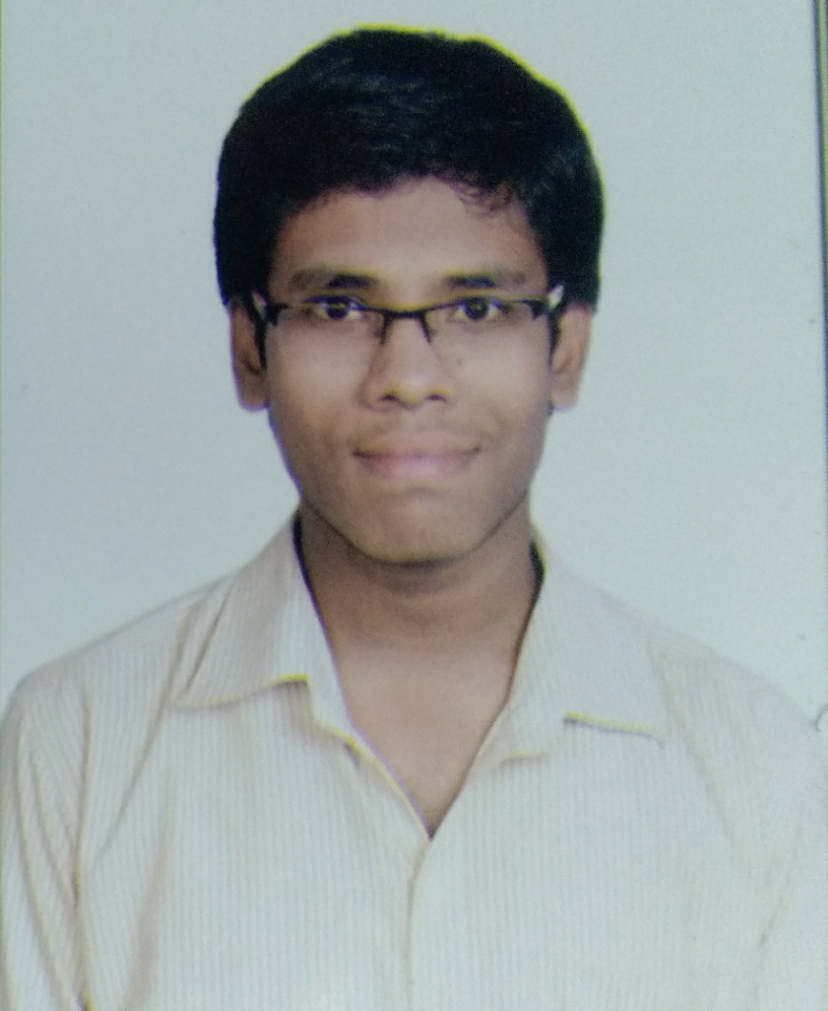

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/My Drive/178X1A0581.jpg') 

In [ ]:
img_pred = image.load_img('/content/drive/My Drive/178X1A0581.jpg',target_size = (350,525))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred,axis = 0)
result = model.predict(img_pred)
if result[0][0] == 0:
  prediction = "With mask"
else:
  prediction = "With out mask"
print(result)

[[1.]]


In [ ]:
print(prediction)

With out mask


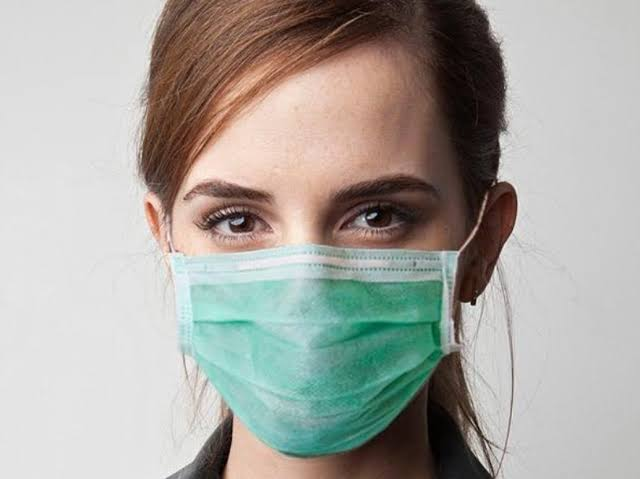

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/My Drive/Colab Notebooks/face_mask/mask.jpeg') 

In [ ]:
img_pred = image.load_img('/content/drive/My Drive/Colab Notebooks/face_mask/mask.jpeg',target_size = (350,525))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred,axis = 0)
result = model.predict(img_pred)
if result[0][0] == 0:
  prediction = "With mask"
else:
  prediction = "With out mask"
print(result)

[[0.]]


In [ ]:
print(prediction)

With mask


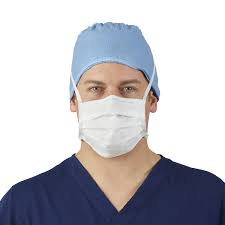

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/My Drive/Colab Notebooks/face_mask/mask2.jpeg') 

In [ ]:
img_pred = image.load_img('/content/drive/My Drive/Colab Notebooks/face_mask/mask2.jpeg',target_size = (350,525))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred,axis = 0)
result = model.predict(img_pred)
if result[0][0] == 0:
  prediction = "With mask"
else:
  prediction = "With out mask"
print(result)

[[0.]]


In [ ]:
print(prediction)

With mask


# Saving the Model

In [ ]:
model.save_weights('Face_Mask_Detector.h5')